# Video Game Sales Prediction 

#### Inspecting Data 

In [1]:
# importing the necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset using pandas library


df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#droping the Null Values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df= df.dropna()

In [9]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [10]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## EDA

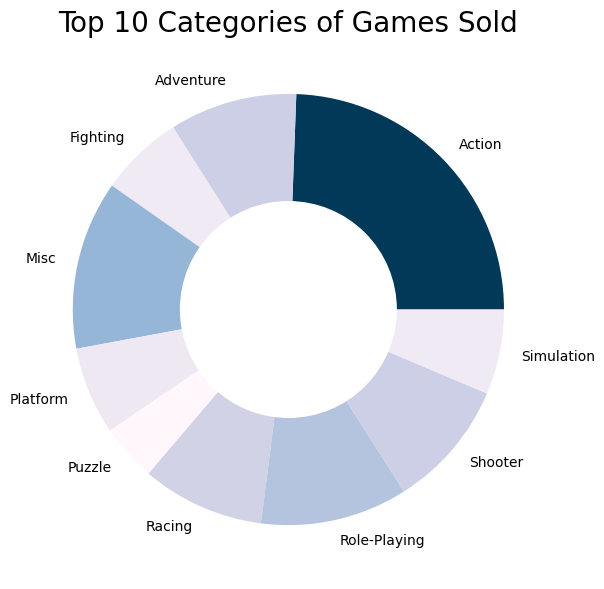

In [11]:
import matplotlib as mpl
game = df.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

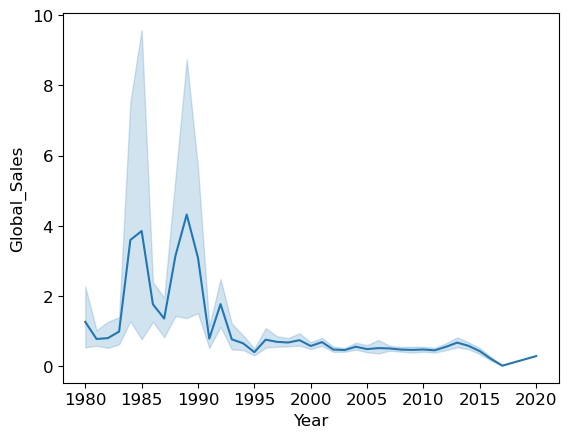

In [23]:
sns.lineplot(x='Year', y='Global_Sales', data=df)
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Step 1: Handle missing values
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)




In [13]:
# Step 2: Label Encoding for categorical columns
le_platform = LabelEncoder()
le_genre = LabelEncoder()
le_publisher = LabelEncoder()

df['Platform_encoded'] = le_platform.fit_transform(df['Platform'])
df['Genre_encoded'] = le_genre.fit_transform(df['Genre'])
df['Publisher_encoded'] = le_publisher.fit_transform(df['Publisher'])




In [14]:
# Step 3: Prepare features and target
X = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
        'Platform_encoded', 'Genre_encoded', 'Publisher_encoded']]
y = df['Global_Sales']



In [15]:
# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### This code implements a Decision Tree Regressor for predicting a target variable, followed by hyperparameter tuning using GridSearchCV to find the best combination of parameters. Here's a detailed breakdown of the entire process:

In [16]:
# -----------------------------
# Decision Tree Regressor (with Tuning)
# -----------------------------

# Decision Tree Tuning
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

#GridSearchCV is used to automate the process of hyperparameter tuning. 
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, n_jobs=-1) 
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Best Params: {dt_grid.best_params_}")
print(f"Decision Tree - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree - R-squared (R2 Score): {r2_dt}")



Decision Tree - Best Params: {'max_depth': None, 'min_samples_split': 5}
Decision Tree - Mean Squared Error (MSE): 0.7190075696362209
Decision Tree - R-squared (R2 Score): 0.831927772345852


#### This code is implementing a Random Forest Regressor for predicting a target variable, followed by hyperparameter tuning using GridSearchCV to find the best parameter combinations. Let's go through the code step by step:

In [17]:
# -----------------------------
# Random Forest Regressor (with Tuning)
# -----------------------------

# Random Forest Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Best Params: {rf_grid.best_params_}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2 Score): {r2_rf}")



Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Mean Squared Error (MSE): 0.7893799874769998
Random Forest - R-squared (R2 Score): 0.815477807795559


#### This code is implementing Linear Regression, a simple and commonly used regression algorithm that doesn't require hyperparameter tuning. Here's a breakdown of the process:#### This code is implementing Linear Regression, a simple and commonly used regression algorithm that doesn't require hyperparameter tuning. Here's a breakdown of the process:

In [18]:
# -----------------------------
# Linear Regression (No tuning necessary)
# -----------------------------

lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
y_pred_lr = lr_regressor.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - R-squared (R2 Score): {r2_lr}")



Linear Regression - Mean Squared Error (MSE): 2.8683907961846743e-05
Linear Regression - R-squared (R2 Score): 0.999993294968631


#### This code implements a K-Nearest Neighbors (KNN) Regressor with hyperparameter tuning using GridSearchCV to optimize the model’s performance. Here’s a step-by-step explanation of the process:

In [19]:
# -----------------------------
# K-Nearest Neighbors Regressor (with Tuning)
# -----------------------------

# KNN Tuning
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - Best Params: {knn_grid.best_params_}")
print(f"KNN - Mean Squared Error (MSE): {mse_knn}")
print(f"KNN - R-squared (R2 Score): {r2_knn}")



KNN - Best Params: {'n_neighbors': 3, 'weights': 'distance'}
KNN - Mean Squared Error (MSE): 1.2304038044334038
KNN - R-squared (R2 Score): 0.712385909330706


#### This code implements a Gradient Boosting Regressor with hyperparameter tuning using GridSearchCV to optimize its performance. Here's a step-by-step breakdown of the process:

In [20]:
# -----------------------------
# Gradient Boosting Regressor (with Tuning)
# -----------------------------

# Gradient Boosting Tuning
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, n_jobs=-1)
gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Best Params: {gb_grid.best_params_}")
print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting - R-squared (R2 Score): {r2_gb}")



Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting - Mean Squared Error (MSE): 0.6261375544548627
Gradient Boosting - R-squared (R2 Score): 0.8536366819498256


#### This code implements a Support Vector Regressor (SVR) with hyperparameter tuning using GridSearchCV. Below is a detailed explanation of the process:

In [21]:
# -----------------------------
# Support Vector Regressor (SVR) (with Tuning)
# -----------------------------

# SVR Tuning
svr_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
svr_grid = GridSearchCV(SVR(), svr_params, cv=5, n_jobs=-1)
svr_grid.fit(X_train, y_train)

best_svr = svr_grid.best_estimator_
y_pred_svr = best_svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Best Params: {svr_grid.best_params_}")
print(f"SVR - Mean Squared Error (MSE): {mse_svr}")
print(f"SVR - R-squared (R2 Score): {r2_svr}")



SVR - Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVR - Mean Squared Error (MSE): 3.339057036849044
SVR - R-squared (R2 Score): 0.21947587459835005


#### This code snippet performs a final comparison of all machine learning models that have been trained and evaluated throughout the analysis. It presents the performance metrics of each model, allowing for a straightforward comparison to determine which model performed best in predicting the target variable. Below is a breakdown of the process:

In [22]:
# -----------------------------
# Final Comparison of All Models
# -----------------------------

print("\n--- Model Comparison ---")
print(f"Decision Tree - Best Params: {dt_grid.best_params_}, MSE: {mse_dt}, R2 Score: {r2_dt}")
print(f"Random Forest - Best Params: {rf_grid.best_params_}, MSE: {mse_rf}, R2 Score: {r2_rf}")
print(f"Linear Regression - MSE: {mse_lr}, R2 Score: {r2_lr}")
print(f"KNN - Best Params: {knn_grid.best_params_}, MSE: {mse_knn}, R2 Score: {r2_knn}")
print(f"Gradient Boosting - Best Params: {gb_grid.best_params_}, MSE: {mse_gb}, R2 Score: {r2_gb}")
print(f"SVR - Best Params: {svr_grid.best_params_}, MSE: {mse_svr}, R2 Score: {r2_svr}")


--- Model Comparison ---
Decision Tree - Best Params: {'max_depth': None, 'min_samples_split': 5}, MSE: 0.7190075696362209, R2 Score: 0.831927772345852
Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}, MSE: 0.7893799874769998, R2 Score: 0.815477807795559
Linear Regression - MSE: 2.8683907961846743e-05, R2 Score: 0.999993294968631
KNN - Best Params: {'n_neighbors': 3, 'weights': 'distance'}, MSE: 1.2304038044334038, R2 Score: 0.712385909330706
Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, MSE: 0.6261375544548627, R2 Score: 0.8536366819498256
SVR - Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}, MSE: 3.339057036849044, R2 Score: 0.21947587459835005
